# CLUSTERING ANALYSIS 

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


East-West Airlines is trying to learn more about its customers.  Key issues are their				
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit				
card.  The task is to identify customer segments via clustering.				
				
				
Source: Based upon real business data; company names have been changed.				
(c) 2016 Galit Shmueli and Peter Bruce				
				
				
Field Name	Data Type	Max Data LengthRaw Data or Telcom Created Field?	Description
ID#	          NUMBER		            Telcom	                             Unique ID
Balance       NUMBER	  8           	Raw	                                 Number of miles eligible for award travel
Qual_miles    NUMBER	  8	            Raw	                                 Number of miles counted as qualifying for Topflight status
cc1_miles	CHAR	1	Raw	Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles	CHAR	1	Raw	Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles	CHAR	1	Raw	Number of miles earned with Small Business credit card in the past 12 months:
   note:  miles bins:				1 = under 5,000
				2 = 5,000 - 10,000
				3 = 10,001 - 25,000
				4 = 25,001 - 50,000
				5 = over 50,000
Bonus_miles	NUMBER		Raw	Number of miles earned from non-flight bonus transactions in the past 12 months
Bonus_trans	NUMBER		Raw	Number of non-flight bonus transactions in the past 12 months
Flight_miles_12mo	NUMBER		Raw	Number of flight miles in the past 12 months
Flight_trans_12	NUMBER		Raw	Number of flight transactions in the past 12 months
Days_since_enroll	NUMBER		Telcom	Number of days since Enroll_date
Award?	NUMBER		Telcom	Dummy variable for Last_award (1=not null, 0=null)


## Objective:
### The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.Datasets :

In [1]:
#importing the data manuplating libraries

import pandas as pd
import numpy as np


In [2]:
#loading the dataset

df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [4]:
#checking the shape of data

df.shape

(3999, 12)

In [5]:
#checking the describtive statistic of data

df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
#getting the information of data and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#droping the id column because it dont serve any thing for clustering 

df.drop(columns=['ID#'],inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


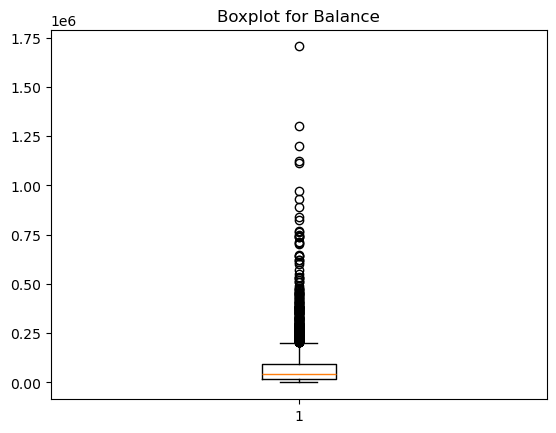

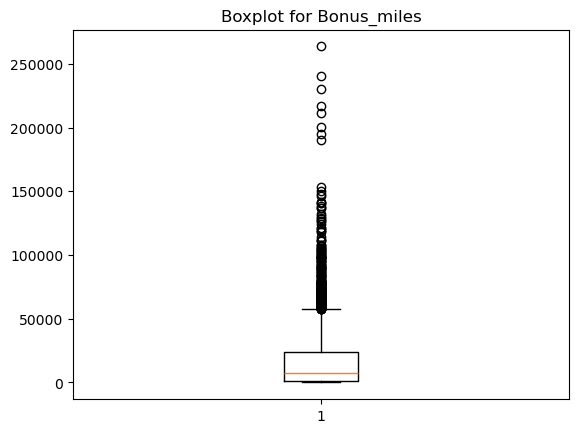

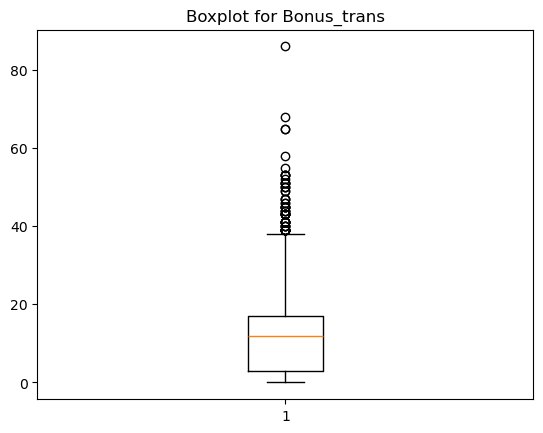

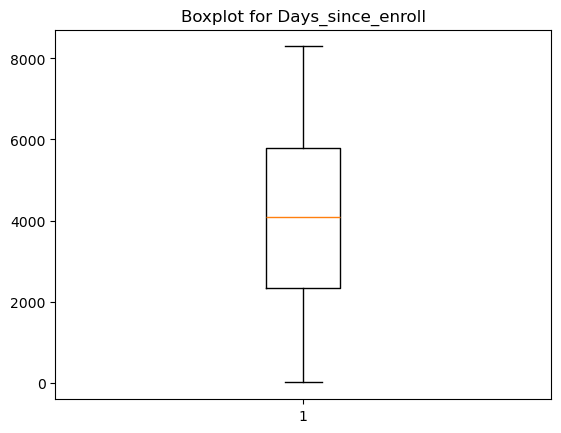

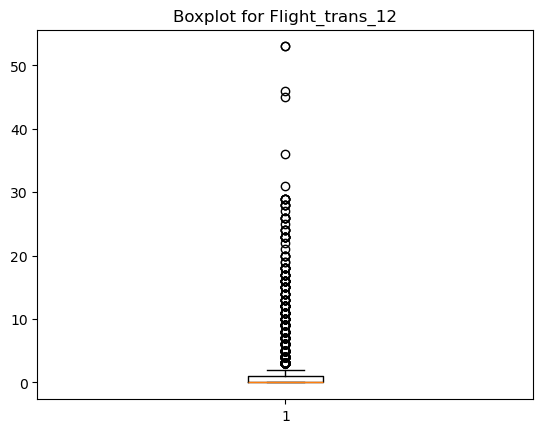

In [8]:
#creating the boxplot for checking the outlayers

import matplotlib.pyplot as plt

columns=['Balance','Bonus_miles','Bonus_trans','Days_since_enroll','Flight_trans_12']

for i in columns:
    plt.boxplot(df[i])
    plt.title(f"Boxplot for {i}")
    plt.show()

In [9]:
#from the above information from box plot we can find some outliers but i am not going to remove them because the dbscan will handle noise/outliers

#### I beleve that  Scaling after EDA is best approach 

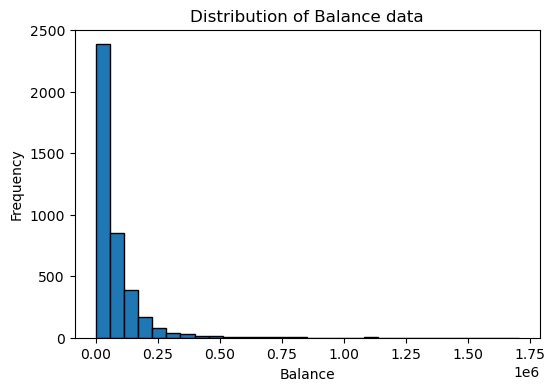

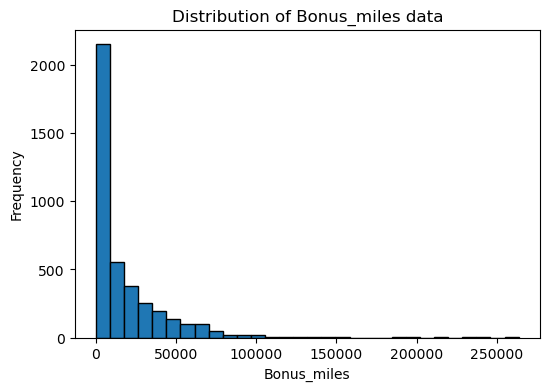

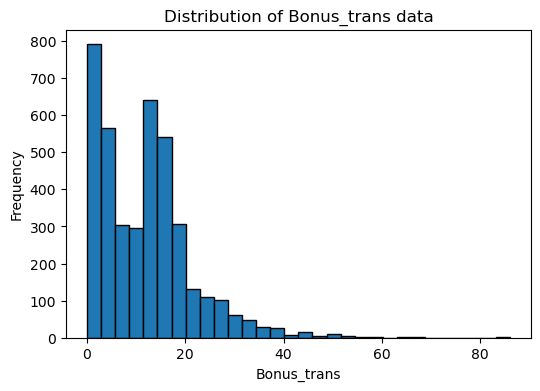

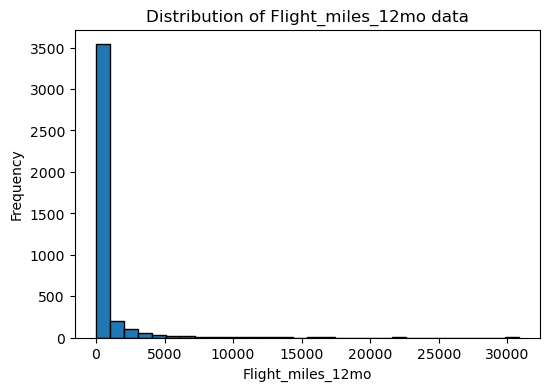

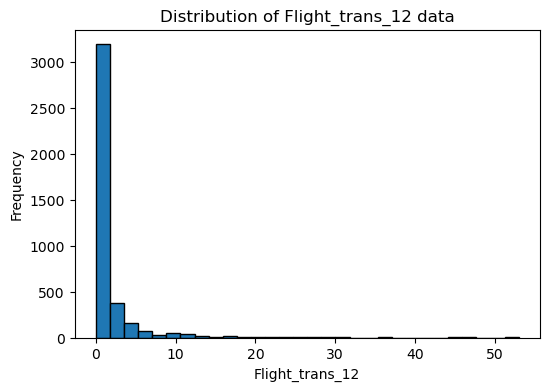

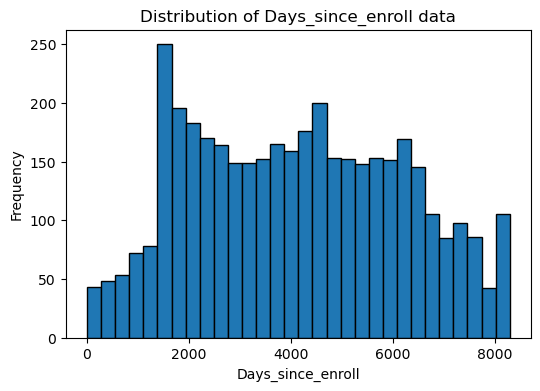

skewness of is Balance =5.004187034431081 
kurtisis of is Balance =44.15793164623947 

skewness of is Bonus_miles =2.8420933668869197 
kurtisis of is Bonus_miles =13.630489238331991 

skewness of is Bonus_trans =1.1573624831608498 
kurtisis of is Bonus_trans =2.7457371278773044 

skewness of is Flight_miles_12mo =7.451666167619329 
kurtisis of is Flight_miles_12mo =94.76101871527655 

skewness of is Flight_trans_12 =5.490461246535664 
kurtisis of is Flight_trans_12 =42.978152375989566 

skewness of is Days_since_enroll =0.12017356507902774 
kurtisis of is Days_since_enroll =-0.9675053776216838 



In [10]:
#creating the histograms for the continuous data 

columns =['Balance','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']
for i in columns:
    plt.figure(figsize=(6, 4))  # Optional: Adjust figure size
    plt.hist(df[i], bins=30, edgecolor='black')  # Added bins for better visualization
    plt.title(f"Distribution of {i} data")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()  # Display the plot

for i in columns:
    a=df[i].skew()
    b=df[i].kurt()
    print(f"skewness of is {i} ={a} ")
    print(f"kurtisis of is {i} ={b} ")
    print()

In [11]:
#checkinhg the coloumns names 
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

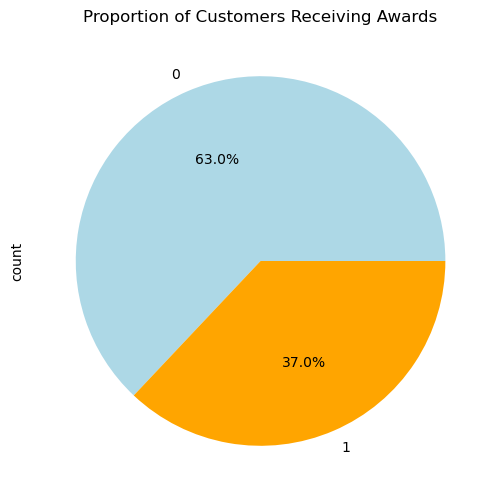

In [12]:
#creating the pie chart for th categorical data

columns=[ 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Award?']


plt.figure(figsize=(6, 6))
df['Award?'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Proportion of Customers Receiving Awards")
plt.show()

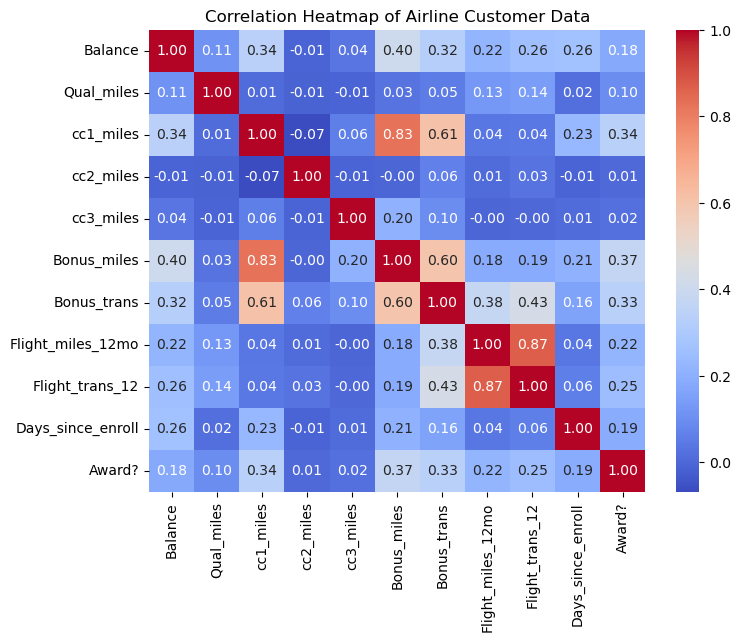

In [13]:
#creating the heatmap for the dataset

import seaborn as sns
# Convert categorical variables to numeric for heatmap
df_encoded = df.copy()
df_encoded['Award?'] = df_encoded['Award?'].astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Airline Customer Data")
plt.show()

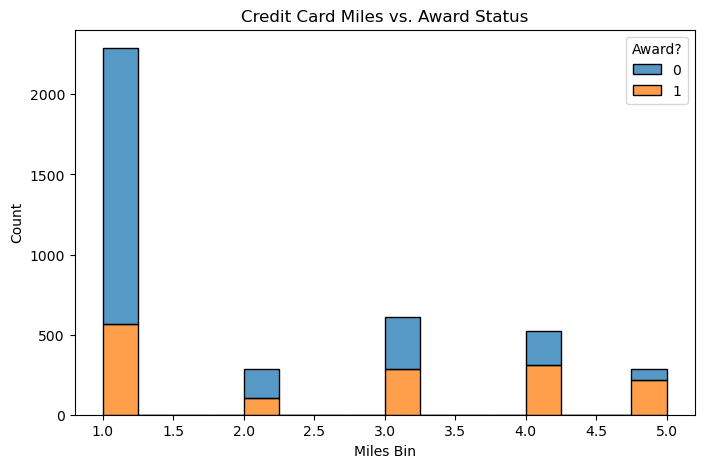

In [14]:
#creating the stacked bar chart

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='cc1_miles', hue='Award?', multiple='stack')
plt.title("Credit Card Miles vs. Award Status")
plt.xlabel("Miles Bin")
plt.ylabel("Count")
plt.show()


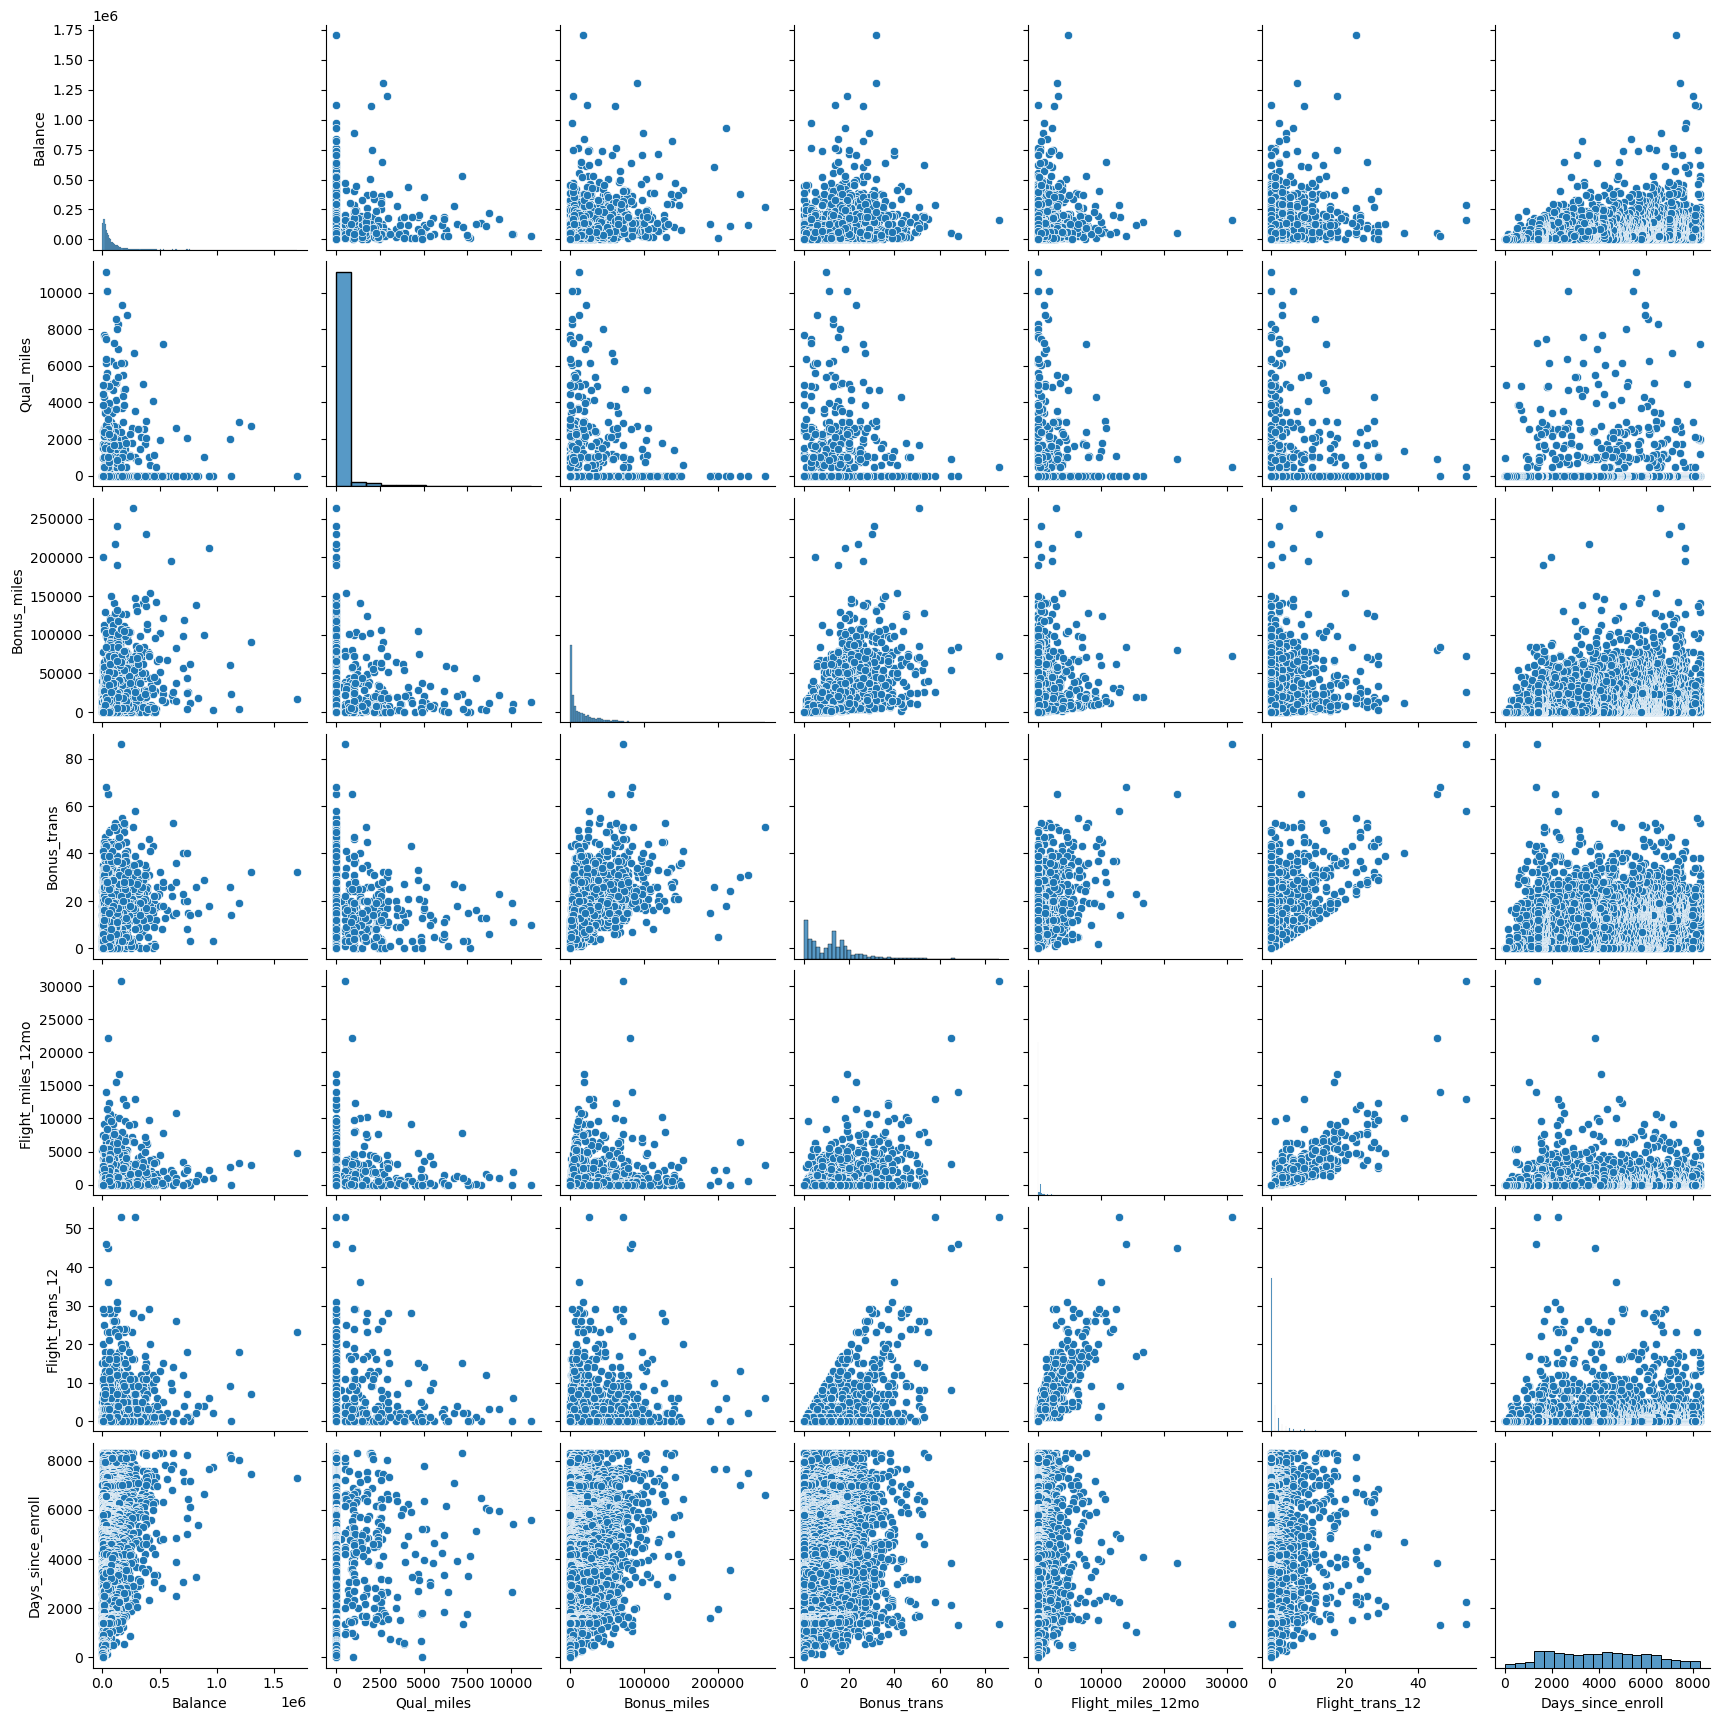

In [15]:
#creating the pairplots for the data where diagonals are histograms and other are scatterplots

sns.pairplot(df[['Balance','Qual_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']])
plt.show()

In [16]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [17]:
#counting the uniques values form the columns which are numeric but not continuous

df['cc1_miles'].value_counts(),df['cc2_miles'].value_counts(),df['cc3_miles'].value_counts(),df['Award?'].value_counts(),

(cc1_miles
 1    2289
 3     613
 4     525
 5     288
 2     284
 Name: count, dtype: int64,
 cc2_miles
 1    3956
 2      28
 3      15
 Name: count, dtype: int64,
 cc3_miles
 1    3981
 4       6
 5       5
 3       4
 2       3
 Name: count, dtype: int64,
 Award?
 0    2518
 1    1481
 Name: count, dtype: int64)

In [18]:
#scaling the data or data transformation

from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()

df_scale=scale.fit_transform(df)

df_scale=pd.DataFrame(df_scale)
df_scale.columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']
df_scale


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Implementing Clustering Algorithms:

•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [19]:
#implementing KMeans algorithm


from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Define parameter grid
param_grid = {"n_clusters": list(range(2, 11))}  # Fixed parameter name

# Initialize KMeans model
cluster = KMeans(random_state=37, n_init=10)

# Perform Grid Search
grid = GridSearchCV(cluster, param_grid, cv=5)
grid.fit(df_scale)  # Ensure data is scaled before fitting

# Print best cluster count
print( grid.best_params_)

{'n_clusters': 10}


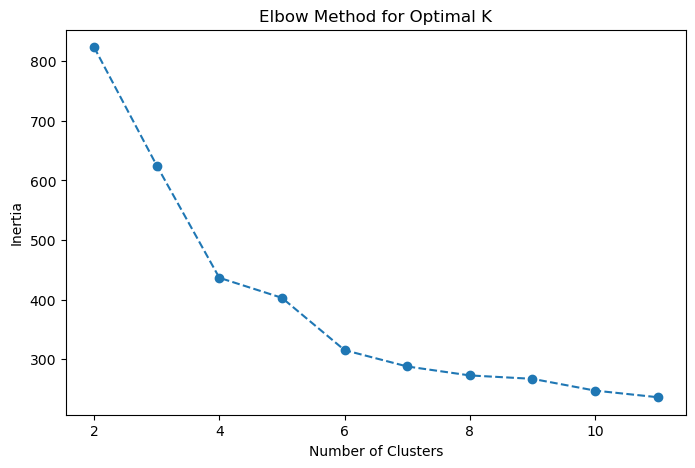

In [20]:
# Finding optimal K using Elbow Method

inertia=[]
k_values=range(2,12)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=37)
    kmeans.fit(df_scale)
    inertia.append(kmeans.inertia_) # inertia is sum of squared distance between each data points and centroid of its assigned clusters
                                    # lower inertia suggest that points are closer to centroid(better clusters) 
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()



In [21]:
#applying the Kmeans with the k value
clusters=KMeans(n_clusters=9,random_state=37,n_init=18)

df['K_means=9']=clusters.fit_predict(df_scale)

print("Silhouette score for K-Means:",silhouette_score(df_scale,df['K_means=9']))

Silhouette score for K-Means: 0.3845882902873157


In [22]:
#testing the k menas for different k values and checking the score

k_value=range(2,12)
for i in  k_value:
    clusters=KMeans(n_clusters=i,random_state=37,n_init=18)
    a=clusters.fit_predict(df_scale)
    print(f"Silhouette score for K-Means={i}:",silhouette_score(df_scale,a))
  

Silhouette score for K-Means=2: 0.535930510919477
Silhouette score for K-Means=3: 0.46484529388583046
Silhouette score for K-Means=4: 0.47483765255961
Silhouette score for K-Means=5: 0.4430672072796034
Silhouette score for K-Means=6: 0.4021621004641961
Silhouette score for K-Means=7: 0.3909601011818369
Silhouette score for K-Means=8: 0.38086731548495273
Silhouette score for K-Means=9: 0.3845882902873157
Silhouette score for K-Means=10: 0.3452190749987779
Silhouette score for K-Means=11: 0.3475687170441708


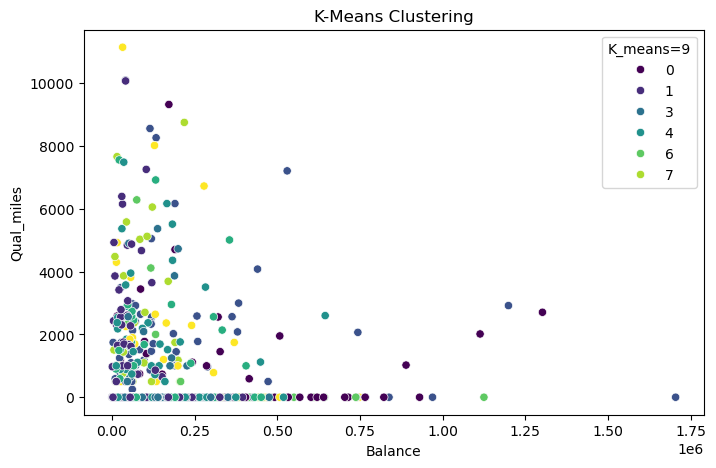

In [23]:
# Scatter plot for K-Means clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['K_means=9'], palette="viridis")
plt.title("K-Means Clustering")
plt.show()


### Hierarchical clustering

In [24]:
#apply the agglometarive clustering

from sklearn.cluster import AgglomerativeClustering

hierirarchical=AgglomerativeClustering(n_clusters=5,linkage='single')

df_scale['Hierirarchical clusters']=hierirarchical.fit_predict(df_scale)

print("scoring of hierarichical clustering with single linkage",silhouette_score(df_scale,df_scale['Hierirarchical clusters']))

scoring of hierarichical clustering with single linkage 0.641735042607428


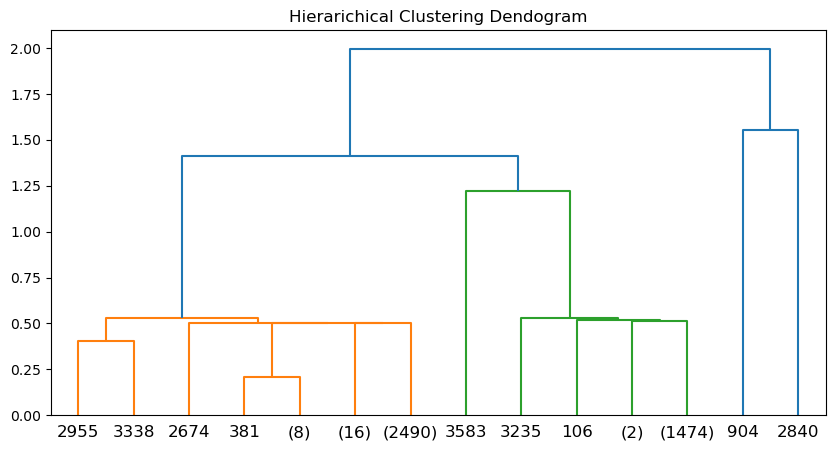

In [25]:
# visualizing dendograms 
from scipy.cluster.hierarchy import linkage,dendrogram

plt.figure(figsize=(10,5))
linked=linkage(df_scale,method='single')
dendrogram(linked,truncate_mode='level',p=5)  #truncate mode=limits how many levels of dendogram are diaplayed
plt.title("Hierarichical Clustering Dendogram")  #p=5  only the first 5 levels 
plt.show()

In [26]:
# hierarchical using complete linkage

hierar2=AgglomerativeClustering(n_clusters=5,linkage='complete')
df_scale['Hierar with Complete']=hierar2.fit_predict(df_scale)

print("Silhouette score of complete linkage",silhouette_score(df_scale,df_scale['Hierar with Complete']))

Silhouette score of complete linkage 0.7447346914863764


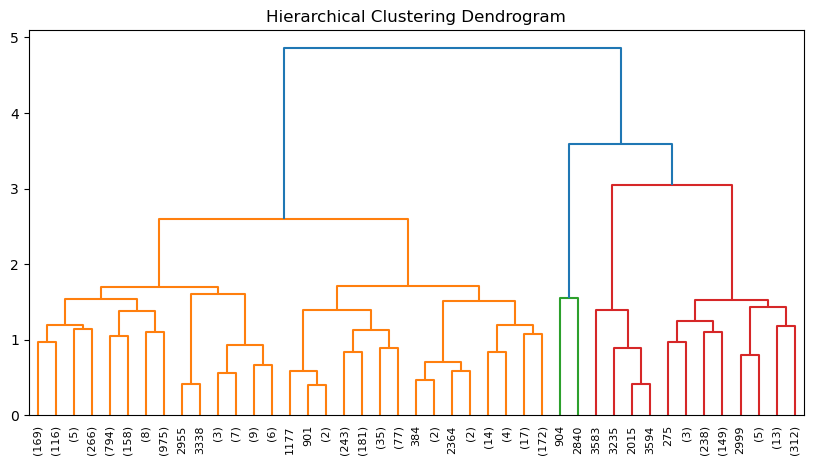

In [27]:
# dendrogram for complete linkage

plt.figure(figsize=(10,5))
linked=linkage(df_scale,method='complete')
dendrogram(linked,truncate_mode='level',p=5)#p=controls the level
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [28]:
# hierarical with average linkage method

hier3=AgglomerativeClustering(n_clusters=5,linkage='average')
df_scale['hierar with average']=hier3.fit_predict(df_scale)

print("scoring of hierarichical clustering with average linkage",silhouette_score(df_scale,df_scale['hierar with average']))

scoring of hierarichical clustering with average linkage 0.7725894587223047


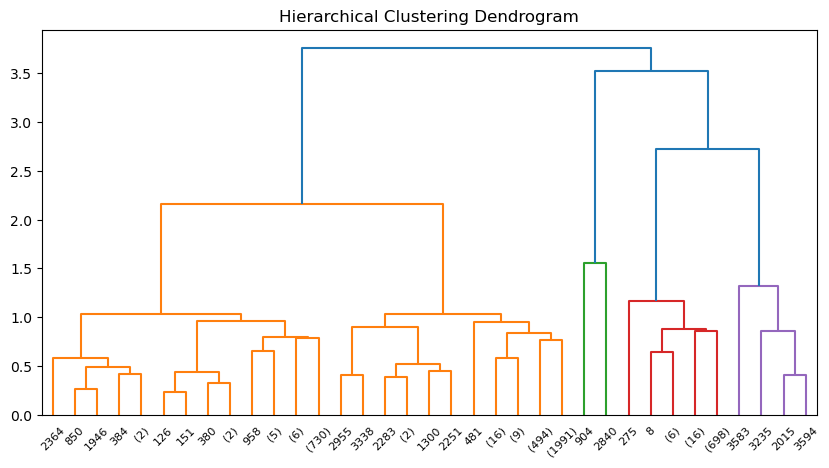

In [29]:
# dendrogram for complete linkage

plt.figure(figsize=(10,5))
linked=linkage(df_scale,method='average')
dendrogram(linked,truncate_mode='level',p=5)#p=controls the level
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [30]:
# hierarical with ward linkage method

hier3=AgglomerativeClustering(n_clusters=5,linkage='ward')
df_scale['hierar with average']=hier3.fit_predict(df_scale)

print("scoring of hierarichical clustering with ward linkage",silhouette_score(df_scale,df_scale['hierar with average']))

scoring of hierarichical clustering with ward linkage 0.7791679505264748


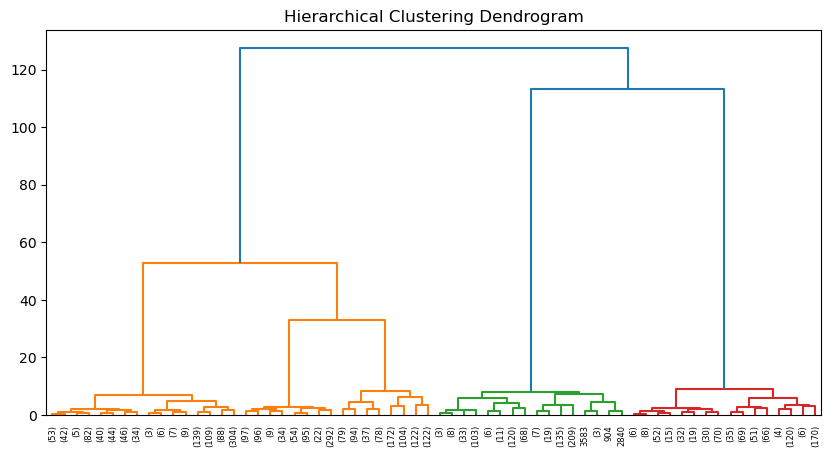

In [31]:
# dendrogram for complete linkage

plt.figure(figsize=(10,5))
linked=linkage(df_scale,method='ward')
dendrogram(linked,truncate_mode='level',p=5)#p=controls the level
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


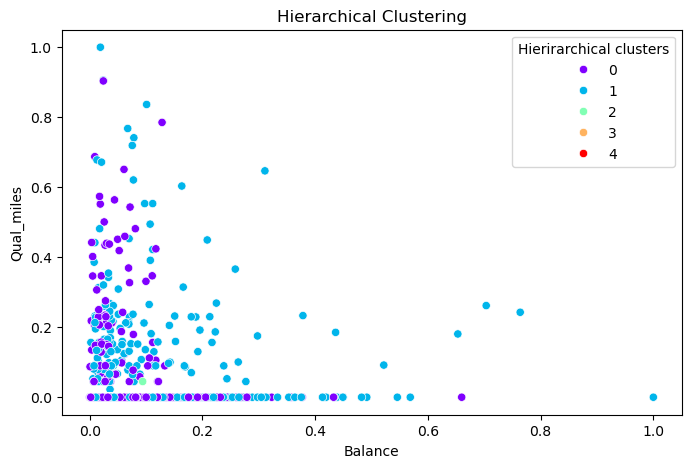

In [32]:
# Scatter plot for Hierarchical clustering results

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scale.iloc[:, 0], y=df_scale.iloc[:, 1], hue=df_scale['Hierirarchical clusters'], palette="rainbow")
plt.title("Hierarchical Clustering")
plt.show()

#### DBSCAN(Density Base Saptial Clustering Application With Noise)

In [33]:
#creating the clusters form the dbscan clustering algorithm 

from sklearn.cluster import DBSCAN

density=DBSCAN(eps=1.5, min_samples=5)
df_scale["DBSCAN-clusters"]=density.fit_predict(df_scale)

#evaluating the results of DBSCAN if only clusters are form

if len(set(density.labels_))>1:
    print("silhouette score for DBSCAN:",silhouette_score(df_scale,df_scale["DBSCAN-clusters"]))
else:
    print("DBSCAN resulted in one large cluster or noise")

silhouette score for DBSCAN: 0.7541848060326877


In [34]:
#checking for how many  clusters are formed

df_scale["DBSCAN-clusters"].value_counts()

DBSCAN-clusters
 0    2518
 1     753
 2     722
-1       6
Name: count, dtype: int64

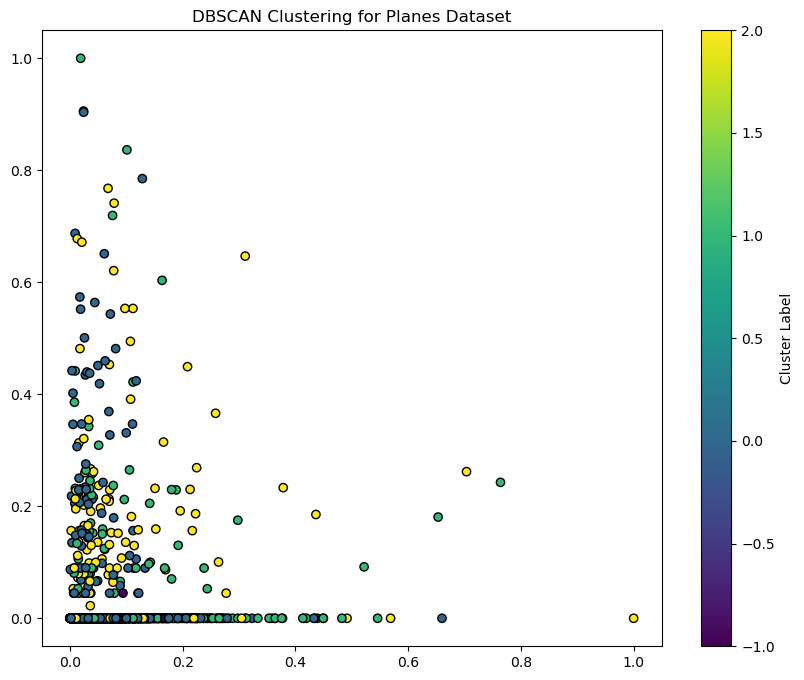

In [35]:
#creating the scatter plots for dbscan clustering results

plt.figure(figsize=(10,8))
plt.scatter(df_scale.iloc[:,0],y=df_scale.iloc[:,1],c=df_scale["DBSCAN-clusters"],cmap='viridis',edgecolors='black')
#plt.xlabel(df_scale.iloc[0])
#plt.ylabel(df_scale.iloc[1])
plt.title("DBSCAN Clustering for Planes Dataset")
plt.colorbar(label="Cluster Label")
plt.show()


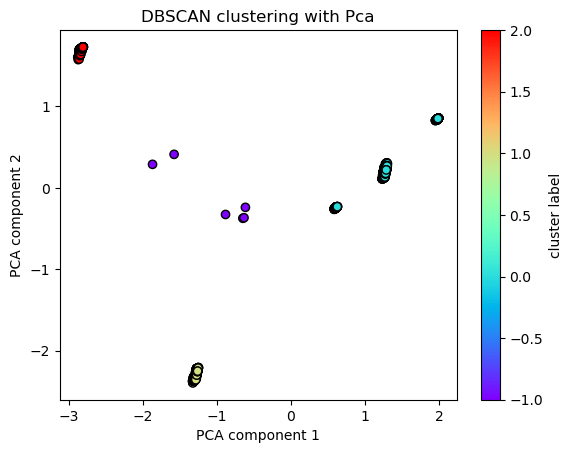

In [36]:
#tring to apply the pca nd reduce dimension and visyualizing the results


from sklearn.decomposition import PCA

pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scale)

df_pca=pd.DataFrame(df_pca)

#visualizing the results

plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=df_scale['DBSCAN-clusters'],cmap='rainbow',edgecolor='black')
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("DBSCAN clustering with Pca")
plt.colorbar(label='cluster label')
plt.show()

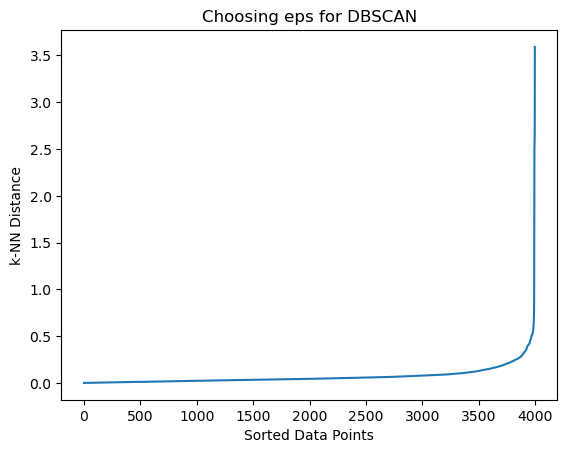

In [37]:
#finding the best eps and min_samples values using knn distance plot

from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scale)
distances, indices = neighbors_fit.kneighbors(df_scale)

# Sort distances and plot
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Sorted Data Points")
plt.ylabel("k-NN Distance")
plt.title("Choosing eps for DBSCAN")
plt.show()



In [38]:
#fromthe above graph we cam select the curving points to select the eplison values

eps_values = [0.2,0.3,0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scale)
        score = silhouette_score(df_scale, labels) if len(set(labels)) > 1 else -1
        print(f"DBSCAN (eps={eps}, min_samples={min_samples}) → Silhouette Score: {score:.3f}")

DBSCAN (eps=0.2, min_samples=3) → Silhouette Score: 0.405
DBSCAN (eps=0.2, min_samples=5) → Silhouette Score: 0.406
DBSCAN (eps=0.2, min_samples=10) → Silhouette Score: 0.393
DBSCAN (eps=0.3, min_samples=3) → Silhouette Score: 0.551
DBSCAN (eps=0.3, min_samples=5) → Silhouette Score: 0.585
DBSCAN (eps=0.3, min_samples=10) → Silhouette Score: 0.701
DBSCAN (eps=0.5, min_samples=3) → Silhouette Score: 0.584
DBSCAN (eps=0.5, min_samples=5) → Silhouette Score: 0.583
DBSCAN (eps=0.5, min_samples=10) → Silhouette Score: 0.717
DBSCAN (eps=1.0, min_samples=3) → Silhouette Score: 0.785
DBSCAN (eps=1.0, min_samples=5) → Silhouette Score: 0.786
DBSCAN (eps=1.0, min_samples=10) → Silhouette Score: 0.786
DBSCAN (eps=1.5, min_samples=3) → Silhouette Score: 0.736
DBSCAN (eps=1.5, min_samples=5) → Silhouette Score: 0.754
DBSCAN (eps=1.5, min_samples=10) → Silhouette Score: 0.754
DBSCAN (eps=2.0, min_samples=3) → Silhouette Score: 0.736
DBSCAN (eps=2.0, min_samples=5) → Silhouette Score: 0.754
DBSCAN (e

silhouette score for DBSCAN: 0.866340697809838


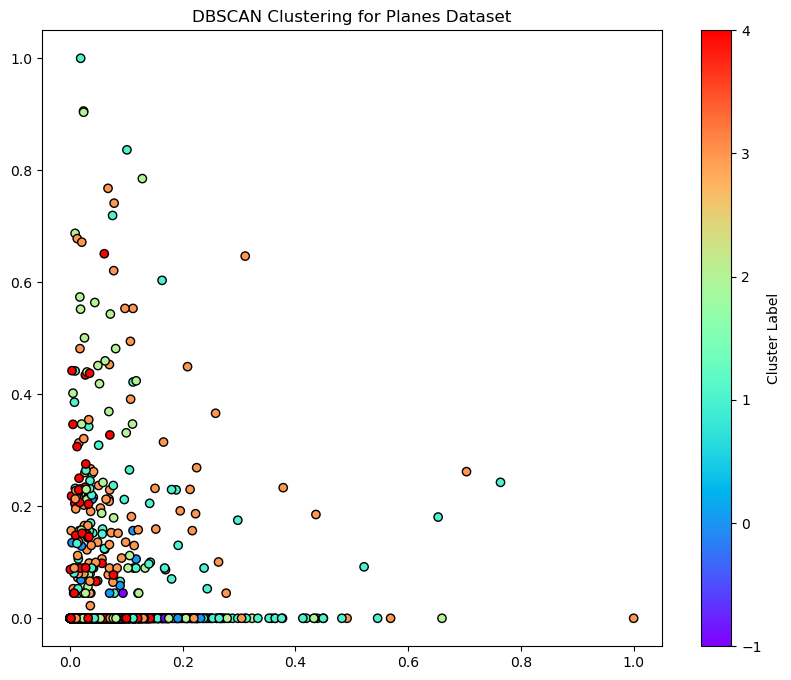

In [39]:
#from the above results we can conclude that what what eplison value and min_splits the best silhouette score is giving


density=DBSCAN(eps=1, min_samples=5)
df_scale["DBSCAN-clusters2"]=density.fit_predict(df_scale)

#evaluating the results of DBSCAN if only clusters are form

if len(set(density.labels_))>1:
    print("silhouette score for DBSCAN:",silhouette_score(df_scale,df_scale["DBSCAN-clusters2"]))
else:
    print("DBSCAN resulted in one large cluster or noise")

plt.figure(figsize=(10,8))
plt.scatter(df_scale.iloc[:,0],y=df_scale.iloc[:,1],c=df_scale["DBSCAN-clusters2"],cmap='rainbow',edgecolors='black')
#plt.xlabel(df_scale.iloc[0])
#plt.ylabel(df_scale.iloc[1])
plt.title("DBSCAN Clustering for Planes Dataset")
plt.colorbar(label="Cluster Label")
plt.show()


In [40]:
#conclusion 

#K-Means (9 Segments) → Detailed Micro-Segmentation

#-Frequent Business Travelers – Customers flying often with high spending.

#- Loyal Economy Passengers – Moderate spenders using frequent flyer benefits.

#- Budget Leisure Travelers – Low-cost flyers with infrequent trips.

#- Corporate Flyers with Credit Card Benefits – Customers using airline cards for extra miles.

#- Occasional High-Spenders – Rare travelers who redeem heavy rewards.

#- New & Potential Customers – Recent enrollees with minimal engagement.

#- Regional Travelers – Short-haul travelers with moderate flight activity.

#- Reward Maximizers – Customers traveling strategically for reward benefits.

#- Dormant Customers – Old accounts with very little activity.


In [41]:
#DBSCAN (4 Segments) → Broader Natural Grouping

#- Frequent Flyers – High activity, possibly VIP or business-class travelers.

#- Occasional Travelers – Fly less frequently, possibly vacationers.

#- Low-Engagement Customers – Minimal activity and interaction with airline programs.

#- Outliers & Unclassified (Noise Points) – Customers who don’t fit into a strong category.
